In [1]:
#intall the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
#load and store the data in data frame
df = pd.read_csv("filepath")
df.head()

,Year,growth rate,Total Number(TN),TN by Air,TN by Land,Average stay(days)
0,1964,30.9,9526,8435,1091,NaN
1,1965,-1.4,9388,8303,1085,NaN
2,1966,33.9,12567,11206,1361,NaN
3,1967,44.0,18093,15064,3029,NaN
4,1968,33.8,24209,19717,4492,NaN


In [3]:
#fill the null values of column 'Average stay(days)' with mean value
df = df.fillna(df['Average stay(days)'].mean())

# removing last two data considering them as outlier and storing them in new data frame
df2 = df.iloc[:-2,:]
df2.tail()

,Year,growth rate,Total Number(TN),TN by Air,TN by Land,Average stay(days)
49,2013,-0.7,797616,594848,202768,12.60
50,2014,-0.9,790118,585981,204137,12.44
51,2015,-32.0,538970,407412,131558,13.16
52,2016,40.0,753002,572563,180439,13.40
53,2017,25.0,940218,760577,179641,12.60


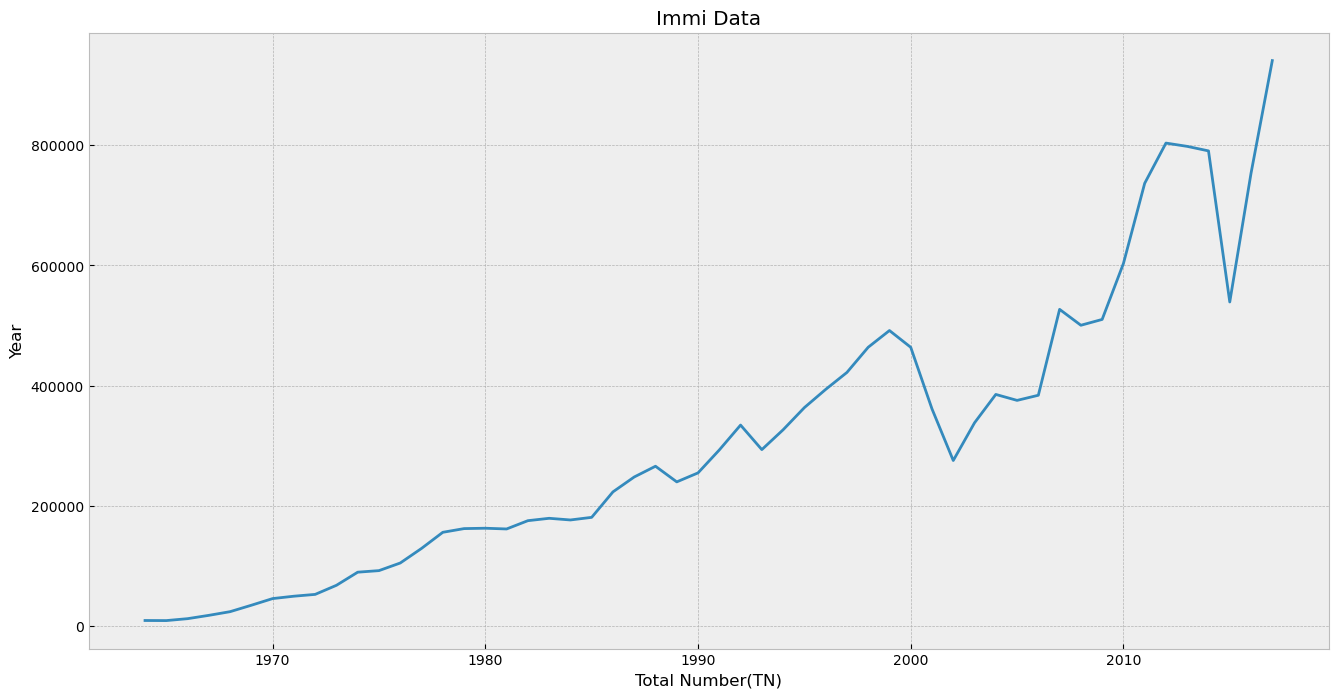

In [4]:
#visualizing the Total Number(TN)
plt.figure(figsize=(16,8))
plt.title('Immi Data')
plt.xlabel('Total Number(TN)')
plt.ylabel('Year')
plt.plot(df2['Year'], df2['Total Number(TN)'])
plt.show()

In [80]:
#get the Total Number(TN)
df2 = df2[['Total Number(TN)']]
df2.head()

,Total Number(TN)
0,9526
1,9388
2,12567
3,18093
4,24209


In [81]:
#create variable to predict x years into the future
future_years = 2
#create a new column (target) shifted to x years up 
df2['Prediction'] = df2[['Total Number(TN)']].shift(-future_years)
df2.tail()

,Total Number(TN),Prediction
49,797616,538970.0
50,790118,753002.0
51,538970,940218.0
52,753002,NaN
53,940218,NaN


In [82]:
#create a data set 'X' and convert into numpy array and remove the alst 'x' years
X = np.array(df2.drop(columns = 'Prediction'))[:-future_years]
X

array([[  9526],
       [  9388],
       [ 12567],
       [ 18093],
       [ 24209],
       [ 34901],
       [ 45970],
       [ 49914],
       [ 52930],
       [ 68047],
       [ 89838],
       [ 92440],
       [105108],
       [129329],
       [156123],
       [162276],
       [162897],
       [161669],
       [175448],
       [179405],
       [176634],
       [180989],
       [223331],
       [248080],
       [265943],
       [239945],
       [254885],
       [292995],
       [334353],
       [293567],
       [326531],
       [363395],
       [393613],
       [421857],
       [463684],
       [491504],
       [463646],
       [361237],
       [275468],
       [338132],
       [385297],
       [375398],
       [383926],
       [526705],
       [500277],
       [509956],
       [602867],
       [736215],
       [803092],
       [797616],
       [790118],
       [538970]], dtype=int64)

In [83]:
#create the target data set 'y' and convert it to numpy array and get all the target values excpet 'x' years
y = np.array(df2['Prediction'])[:-future_years]
print(y)

[ 12567.  18093.  24209.  34901.  45970.  49914.  52930.  68047.  89838.
  92440. 105108. 129329. 156123. 162276. 162897. 161669. 175448. 179405.
 176634. 180989. 223331. 248080. 265943. 239945. 254885. 292995. 334353.
 293567. 326531. 363395. 393613. 421857. 463684. 491504. 463646. 361237.
 275468. 338132. 385297. 375398. 383926. 526705. 500277. 509956. 602867.
 736215. 803092. 797616. 790118. 538970. 753002. 940218.]


In [84]:
#split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [85]:
#create the models
#create the decision tree regressor
tree = DecisionTreeRegressor().fit(x_train, y_train)

In [86]:
#get the 'x' years of future data sets
x_future = df2.drop(columns = 'Prediction')[:-future_years]
x_future = x_future.tail(future_years)
x_future = np.array(x_future)
x_future

array([[790118],
       [538970]], dtype=int64)

In [88]:
#show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[753002. 940218.]
